In [102]:
import geopandas as gpd
import numpy as np
import pandas as pd
import distinctipy

# Assign each vtd to its senate district 
There are 42 state senate districts and 1977 vtds. We need to know which district each vtd belongs to. 

In [93]:
# get the geodataframes for districts and vtds

vtds = gpd.read_file("/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State Shp Files/NM/s_35_vtd_2020_from_block.shp")
vtds['center'] = [geometry.representative_point() for geometry in vtds['geometry']] # add column with center points
vtds.head()

/Users/rebeccawagner/opt/anaconda3/envs/gerry/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,block_vtda,state,Shape_Leng,Shape_Area,ID,OID_1,block_vt_1,total,geometry,center
0,35001000001,35,0.113352,0.000483,0,0,35001000001,2090.0,"POLYGON ((-106.74884 35.21799, -106.73141 35.2...",POINT (-106.73884447705309 35.21038200000007)
1,35001000002,35,0.033215,0.000049,1,1,35001000002,1132.0,"POLYGON ((-106.67201 35.21794, -106.67079 35.2...",POINT (-106.66664080460919 35.213846500000045)
2,35001000003,35,0.073484,0.000223,2,2,35001000003,614.0,"POLYGON ((-106.64563 35.20161, -106.64560 35.2...",POINT (-106.65095661473569 35.19178750000006)
3,35001000004,35,0.106772,0.000285,3,3,35001000004,822.0,"POLYGON ((-106.64074 35.15617, -106.64007 35.1...",POINT (-106.64552719930069 35.15555400000005)
4,35001000005,35,0.113714,0.000334,4,4,35001000005,930.0,"POLYGON ((-106.63341 35.17373, -106.63472 35.1...",POINT (-106.64679868866617 35.18141350000005)


In [94]:
dists = gpd.read_file('/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State Shp Files/NM/s_35.shp')
dists.head()

,ID,DISTRICT,POPULATION,Shape_Leng,Shape_Area,sld_u22,geometry
0,1,1,47068,1.544650,0.043527,35001,"POLYGON ((-108.20971 36.77147, -108.20960 36.7..."
1,2,10,48840,0.711960,0.007563,35010,"POLYGON ((-106.68805 35.13396, -106.68788 35.1..."
2,3,11,50252,0.294066,0.002778,35011,"POLYGON ((-106.76026 35.05588, -106.76061 35.0..."
3,4,12,51681,0.367458,0.003731,35012,"POLYGON ((-106.72010 35.18397, -106.72067 35.1..."
4,5,13,48663,0.549102,0.005031,35013,"POLYGON ((-106.63762 35.04756, -106.63808 35.0..."


In [95]:
# use the center points to preform a spacial join 

overlap = gpd.GeoDataFrame(vtds[['block_vtda','center']],geometry='center').sjoin(dists,how='left',predicate='within')

overlap.head()

/Users/rebeccawagner/opt/anaconda3/envs/gerry/lib/python3.10/site-packages/geopandas/geodataframe.py:2090: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


,block_vtda,center,index_right,ID,DISTRICT,POPULATION,Shape_Leng,Shape_Area,sld_u22
0,35001000001,POINT (-106.73884 35.21038),15,16,23,51288,1.162604,0.037588,35023
1,35001000002,POINT (-106.66664 35.21385),41,42,9,51691,1.256940,0.037606,35009
2,35001000003,POINT (-106.65096 35.19179),1,2,10,48840,0.711960,0.007563,35010
3,35001000004,POINT (-106.64553 35.15555),1,2,10,48840,0.711960,0.007563,35010
4,35001000005,POINT (-106.64680 35.18141),1,2,10,48840,0.711960,0.007563,35010


In [96]:
# merge the overlap with original dataframe and select columns to keep

final_gdf = vtds.merge(overlap, on='block_vtda')[['block_vtda','total','geometry','DISTRICT']]


In [97]:
compare = pd.read_csv('/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/State Shp Files/NM/NM_District_VTD (1).csv')[['block_vtda','DISTRICT']]
compare['block_vtda']

0       35001000001
1       35001000002
2       35001000003
3       35001000004
4       35001000005
           ...     
1972    35061000058
1973    35061000059
1974    35061000060
1975    35061000061
1976    35061000062
Name: block_vtda, Length: 1977, dtype: int64

In [98]:
final_gdf[['block_vtda','DISTRICT']].astype('int').compare(compare)

DISTRICT      
         self other
649      32.0  27.0
922      36.0  38.0
1204      3.0   4.0
1596      2.0  22.0

In [109]:
colors = distinctipy.get_colors(42,pastel_factor=.6)
cmap = distinctipy.get_colormap(colors)

<AxesSubplot: >

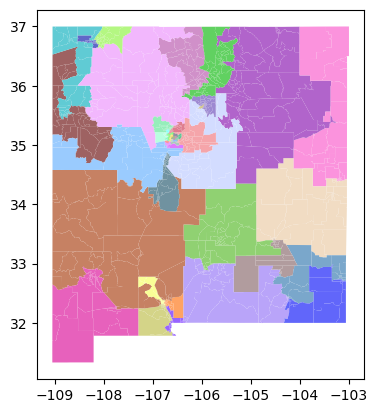

In [110]:
final_gdf.plot(column='DISTRICT',cmap=cmap)

In [113]:
final_gdf[['block_vtda','DISTRICT']].to_csv('/Users/rebeccawagner/Documents/GitHub/GerryGainMCMC/Data/Block to VTD/block_to_vtd_NM.csv')

# Old Code

In [4]:
# this code is creating the comparison between vtds and districts

for i in range(len(dists)): 

    row = dists.loc[i][['ID','geometry']] # for every district
    single_dist = gpd.GeoDataFrame(columns=['ID','geometry'])

    for j in range(len(vtds)): # create a geodataframe with 1977 rows of the same district because contains function compares row-wise

        single_dist.loc[j] = row 

    overlap = single_dist.contains(vtds) # check if the district contains each vtd
    vtds[overlap] = vtds[overlap].replace(0,row[0]) # update the district id of the contained vtds 

/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_93209/78317356.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  overlap = single_dist.contains(vtds) # check if the district contains each vtd
/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_93209/78317356.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  overlap = single_dist.contains(vtds) # check if the district contains each vtd
/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_93209/78317356.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to matc

In [5]:
vtds['district_id'].unique() # there are some vtds that are "unclaimed" ... anything with district id 0 

array([16, 42,  2,  0,  5, 19,  3,  6, 24,  4,  8,  9, 13, 11, 10, 14,  7,
       29, 20, 26, 27, 37, 34, 41, 40, 30, 31, 32, 25, 28, 36, 21, 39, 38,
       15, 23, 35,  1, 12, 33, 18, 17, 22])

In [6]:
vtds[vtds['district_id'] == 0] # 80 of them to be exact

,block_vtda,state,Shape_Leng,Shape_Area,ID,OID_1,block_vt_1,total,geometry,district_id
6,35001000007,35,0.069422,0.000164,6,6,35001000007,1534.0,"POLYGON ((-106.63371 35.18069, -106.62749 35.1...",0
8,35001000009,35,0.066982,0.000198,8,8,35001000009,1323.0,"POLYGON ((-106.61347 35.17552, -106.61360 35.1...",0
24,35001000025,35,0.041783,0.000065,24,24,35001000025,1354.0,"POLYGON ((-106.70860 35.14547, -106.70740 35.1...",0
30,35001000031,35,1.263750,0.051908,30,30,35001000031,1586.0,"POLYGON ((-107.19724 35.21946, -107.19682 35.2...",0
51,35001000052,35,0.072242,0.000114,51,51,35001000052,2464.0,"POLYGON ((-106.75716 35.05620, -106.75690 35.0...",0
...,...,...,...,...,...,...,...,...,...,...
1590,35045000071,35,1.236482,0.077269,1590,1590,35045000071,640.0,"POLYGON ((-107.81887 36.71666, -107.81858 36.7...",0
1682,35049000033,35,0.037423,0.000078,1682,1682,35049000033,1286.0,"POLYGON ((-105.95430 35.68010, -105.95427 35.6...",0
1830,35053000015,35,2.208114,0.118468,1830,1830,35053000015,1559.0,"POLYGON ((-107.53312 34.58059, -107.51555 34.5...",0
1839,35053000024,35,1.660418,0.096147,1839,1839,35053000024,435.0,"POLYGON ((-106.89947 34.58022, -106.89663 34.5...",0


<AxesSubplot: >

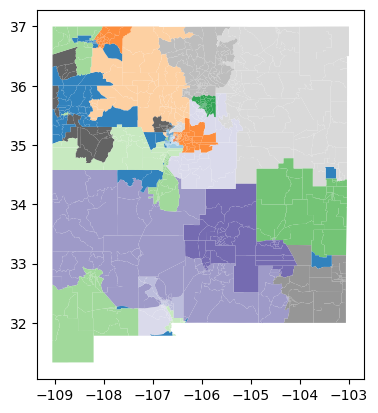

In [7]:
vtds.plot(column='district_id',cmap='tab20c') # the blue vtds are the ones unassigned I believe

## Double checking 

In [8]:
test_row = vtds[vtds['district_id'] == 0].iloc[0][['geometry','district_id']]
test_row

geometry       POLYGON ((-106.63370899999995 35.1806850000000...
district_id                                                    0
Name: 6, dtype: object

In [9]:
single_vtd = gpd.GeoDataFrame(columns=['geometry','district_id'])
for i in range(len(dists)):
    single_vtd.loc[i] = test_row

In [10]:
overlap_2 = single_vtd.within(dists) # see if the vtd is "within" and of the district geometries

/var/folders/25/yq9cvx4n7714ymc6mt488mw80000gn/T/ipykernel_93209/1600396052.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  overlap_2 = single_vtd.within(dists) # see if the vtd is "within" and of the district geometries


In [11]:
dists[overlap_2] # it is not.

,ID,DISTRICT,POPULATION,Shape_Leng,Shape_Area,sld_u22,geometry


## Trying one more thing...

In [13]:
from geopandas.tools import sjoin 

In [22]:
# predicate` must be one of {'covers', 'overlaps', 'intersects', 'crosses', 'touches', 'contains_properly', 'contains', 'within', None

test = sjoin(dists,vtds,how='right',predicate='contains')
test

,index_left,ID_left,DISTRICT,POPULATION,Shape_Leng_left,Shape_Area_left,sld_u22,block_vtda,state,Shape_Leng_right,Shape_Area_right,ID_right,OID_1,block_vt_1,total,geometry,district_id
0,15.0,16.0,23,51288.0,1.162604,0.037588,35023,35001000001,35,0.113352,0.000483,16,16,35001000001,2090.0,"POLYGON ((-106.74884 35.21799, -106.73141 35.2...",16
1,41.0,42.0,9,51691.0,1.256940,0.037606,35009,35001000002,35,0.033215,0.000049,1,1,35001000002,1132.0,"POLYGON ((-106.67201 35.21794, -106.67079 35.2...",42
2,1.0,2.0,10,48840.0,0.711960,0.007563,35010,35001000003,35,0.073484,0.000223,2,2,35001000003,614.0,"POLYGON ((-106.64563 35.20161, -106.64560 35.2...",2
3,1.0,2.0,10,48840.0,0.711960,0.007563,35010,35001000004,35,0.106772,0.000285,3,3,35001000004,822.0,"POLYGON ((-106.64074 35.15617, -106.64007 35.1...",2
4,1.0,2.0,10,48840.0,0.711960,0.007563,35010,35001000005,35,0.113714,0.000334,4,4,35001000005,930.0,"POLYGON ((-106.63341 35.17373, -106.63472 35.1...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,21.0,22.0,29,51784.0,3.690218,0.312866,35029,35061000058,35,0.147482,0.001009,1972,1972,35061000058,1645.0,"POLYGON ((-106.68102 34.77589, -106.68096 34.7...",22
1973,21.0,22.0,29,51784.0,3.690218,0.312866,35029,35061000059,35,0.194726,0.001432,1973,1973,35061000059,1547.0,"POLYGON ((-106.74957 34.74653, -106.74950 34.7...",22
1974,21.0,22.0,29,51784.0,3.690218,0.312866,35029,35061000060,35,0.091329,0.000360,1974,1974,35061000060,979.0,"POLYGON ((-106.67601 34.78376, -106.67585 34.7...",22
1975,21.0,22.0,29,51784.0,3.690218,0.312866,35029,35061000061,35,0.080557,0.000323,1975,1975,35061000061,820.0,"POLYGON ((-106.67208 34.82919, -106.67196 34.8...",22


<AxesSubplot: >

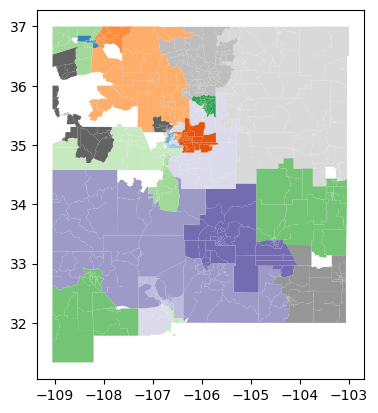

In [23]:

test.plot(column='DISTRICT',cmap='tab20c') # im still not convinced this is right tbh

In [16]:
len(test['DISTRICT'].unique())

42